# Agglomerative

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

Ucitavanje podataka:

In [2]:
data = pd.read_csv('/home/user/Desktop/IP/sredjeni_podaci.csv')
print(data.shape)

(8378, 123)


In [3]:
data.drop("Unnamed: 0",axis=1,inplace = True)

Brisemo cilju promenljivu 'match'

In [4]:
X = data.drop('match',axis=1)
feature_names = X.columns

Standardizacija podataka

In [5]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

In [6]:
model = AgglomerativeClustering(n_clusters=4, linkage='average', compute_distances=True)

In [7]:
model.fit(X)

AgglomerativeClustering(compute_distances=True, linkage='average', n_clusters=4)

Ispisujemo koji podaci pripadaju kom klasteru:

In [8]:
print("Prvom klaseru pripadaju podaci:\n");
print(data[model.labels_ ==0 ])
print("Ukupan broj instanci koje pripadaju prvom klasteru: ",data[model.labels_ == 0].shape[0])

Prvom klaseru pripadaju podaci:

      wave  gender   age  age_o  d_age  d_d_age  race  race_o  samerace   
0      1.0       0  21.0   27.0    6.0        2     1       3         0  \
1      1.0       0  21.0   22.0    1.0        0     1       3         0   
2      1.0       0  21.0   22.0    1.0        0     1       1         1   
3      1.0       0  21.0   23.0    2.0        1     1       3         0   
4      1.0       0  21.0   24.0    3.0        1     1       4         0   
...    ...     ...   ...    ...    ...      ...   ...     ...       ...   
8373  21.0       1  25.0   26.0    1.0        0     3       4         0   
8374  21.0       1  25.0   24.0    1.0        0     3       5         0   
8375  21.0       1  25.0   29.0    4.0        2     3       4         0   
8376  21.0       1  25.0   22.0    3.0        1     3       1         0   
8377  21.0       1  25.0   22.0    3.0        1     3       1         0   

      importance_same_race  ...  d_expected_num_interested_in_me  

In [9]:
print("Drugom klaseru pripadaju podaci:\n");
print(data[model.labels_ ==1 ])
print("Ukupan broj instanci koje pripadaju drugom klasteru: ",data[model.labels_ == 1].shape[0])

Drugom klaseru pripadaju podaci:

     wave  gender   age  age_o  d_age  d_d_age  race  race_o  samerace   
91    1.0       0  26.0   22.0    4.0        2     3       3         1  \
119   1.0       1  22.0   26.0    4.0        2     3       3         1   

     importance_same_race  ...  d_expected_num_interested_in_me   
91                    4.0  ...                                1  \
119                   1.0  ...                                1   

     d_expected_num_matches  like  guess_prob_liked  d_like   
91                        0   1.0               1.0       0  \
119                       1   1.0               1.0       0   

     d_guess_prob_liked  met  decision  decision_o  match  
91                    0  1.0         0           0      0  
119                   0  0.0         0           0      0  

[2 rows x 122 columns]
Ukupan broj instanci koje pripadaju drugom klasteru:  2


In [10]:
print("Trecem  klaseru pripadaju podaci:\n");
print(data[model.labels_ ==2])
print("Ukupan broj instanci koje pripadaju trecem klasteru: ",data[model.labels_ == 2].shape[0])

Trecem  klaseru pripadaju podaci:

      wave  gender   age  age_o  d_age  d_d_age  race  race_o  samerace   
3462  10.0       0  26.0   27.0    1.0        0     1       3         0  \
3463  10.0       0  26.0   28.0    2.0        1     1       3         0   
3464  10.0       0  26.0   32.0    6.0        2     1       3         0   
3465  10.0       0  26.0   25.0    1.0        0     1       3         0   
3466  10.0       0  26.0   25.0    1.0        0     1       1         1   
3467  10.0       0  26.0   27.0    1.0        0     1       5         0   
3468  10.0       0  26.0   33.0    7.0        3     1       5         0   
3469  10.0       0  26.0   25.0    1.0        0     1       5         0   
3470  10.0       0  26.0   33.0    7.0        3     1       5         0   

      importance_same_race  ...  d_expected_num_interested_in_me   
3462                   1.0  ...                                0  \
3463                   1.0  ...                                0   
3464      

In [11]:
print("Cetvrtom klaseru pripadaju podaci:\n");
print(data[model.labels_ ==3])
print("Ukupan broj instanciji koje pripadaju cetvrtom klasteru: ",data[model.labels_ == 3].shape[0])

Cetvrtom klaseru pripadaju podaci:

      wave  gender   age  age_o  d_age  d_d_age  race  race_o  samerace   
6392  15.0       1  29.0   38.0    9.0        3     3       3         1  \
6393  15.0       1  29.0   33.0    4.0        2     3       2         0   
6394  15.0       1  29.0   24.0    5.0        2     3       3         1   
6395  15.0       1  29.0   28.0    1.0        0     3       3         1   
6396  15.0       1  29.0   27.0    2.0        1     3       3         1   
6397  15.0       1  29.0   23.0    6.0        2     3       3         1   
6398  15.0       1  29.0   25.0    4.0        2     3       3         1   
6399  15.0       1  29.0   26.0    3.0        1     3       3         1   
6400  15.0       1  29.0   25.0    4.0        2     3       3         1   
6401  15.0       1  29.0   24.0    5.0        2     3       3         1   
6402  15.0       1  29.0   21.0    8.0        3     3       3         1   
6403  15.0       1  29.0   30.0    1.0        0     3       1   

Zakljucujemo da najveci broj instanci pripada prvom klasteru.

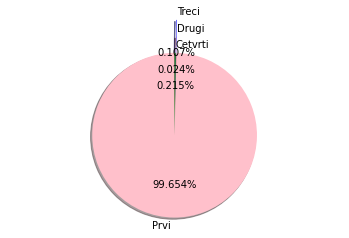

In [12]:

n = data.shape[0]
s1 =data[model.labels_ == 0].shape[0] /n*1.0;
s2 =data[model.labels_ == 1].shape[0] /n*1.0;
s3 =data[model.labels_ == 2].shape[0] /n*1.0;
s4 =data[model.labels_ == 3].shape[0] /n*1.0;

labels = 'Prvi ', 'Drugi', 'Treci', 'Cetvrti'
colors = ["pink","red","blue","green"]
sizes = [s1, s2, s3, s4]
explode = (0, 0.2, 0.4, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.3f%%',
        shadow=True,colors = colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Spajanje instanci:

In [13]:
print(model.children_)

[[  839   847]
 [ 5544  5560]
 [ 5303  5305]
 ...
 [16135 16751]
 [15808 16752]
 [15918 16753]]


In [14]:
print("Distanca izmedju klasa")
print(model.distances_)

Distanca izmedju klasa
[0.52123708 0.54046023 0.62574506 ... 4.9654982  5.04053115 5.16392348]


In [15]:
Z = linkage(X, method='average')
print(Z)

[[8.39000000e+02 8.47000000e+02 5.21237077e-01 2.00000000e+00]
 [5.54400000e+03 5.56000000e+03 5.40460229e-01 2.00000000e+00]
 [5.30300000e+03 5.30500000e+03 6.25745061e-01 2.00000000e+00]
 ...
 [1.61350000e+04 1.67510000e+04 4.96549820e+00 8.35100000e+03]
 [1.58080000e+04 1.67520000e+04 5.04053115e+00 8.36000000e+03]
 [1.59180000e+04 1.67530000e+04 5.16392348e+00 8.37800000e+03]]


In [16]:
print("Silhouette score average: ");
silhouette_score(X,model.labels_)

Silhouette score average: 


0.0762530187538067

Napomena:ispisala sam samo deo vrednosti model.childlen_, model.distance_ i Z, zbog toga sto imam veliki broj spajanja instanci i ako bih ispisala sve,fajl bi postao nepregledan.
Zbog ogromnih broja instanci,vizuelizacija (dendogram) nije moguca. 

Proveravam da li bi bolji silhouette score ako bih umesto linkage = 'average' koristila 'single ' ili 'complete' 

In [17]:
model = AgglomerativeClustering(n_clusters=4, linkage='single')
model.fit(X)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [18]:
print("Silhouette score single: ");

silhouette_score(X,model.labels_)

Silhouette score single: 


0.06081410256514759

In [19]:
model = AgglomerativeClustering(n_clusters=4, linkage='complete')
model.fit(X)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [20]:
print("Silhouette score complete: ");

silhouette_score(X,model.labels_)

Silhouette score complete: 


0.013688779741429605